# Statistical Thinking in Python 1

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline# Set default Seaborn style
sb.set()

In [63]:
import numpy as np
import pandas as pd

In [9]:
import seaborn as sb

In [12]:
# Set default Seaborn style
sb.set()

## 1. Graphical exploratory data analysis

In [10]:
from sklearn.datasets import load_iris
iris = load_iris()
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [25]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], 
      dtype='<U10')

In [43]:
virginica_petal_length = iris.data[100:150,2]
virginica_petal_length

array([ 6. ,  5.1,  5.9,  5.6,  5.8,  6.6,  4.5,  6.3,  5.8,  6.1,  5.1,
        5.3,  5.5,  5. ,  5.1,  5.3,  5.5,  6.7,  6.9,  5. ,  5.7,  4.9,
        6.7,  4.9,  5.7,  6. ,  4.8,  4.9,  5.6,  5.8,  6.1,  6.4,  5.6,
        5.1,  5.6,  6.1,  5.6,  5.5,  4.8,  5.4,  5.6,  5.1,  5.1,  5.9,
        5.7,  5.2,  5. ,  5.2,  5.4,  5.1])

### Histogram

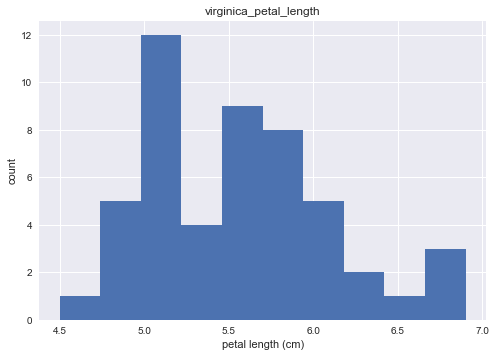

In [46]:
plt.hist(virginica_petal_length)
plt.ylabel('count')
plt.xlabel('petal length (cm)')
plt.title('virginica_petal_length')
plt.show()

In [48]:
# bins

In [50]:
n_data = len(virginica_petal_length)
n_bins = int(np.sqrt(n_data))
n_bins

7

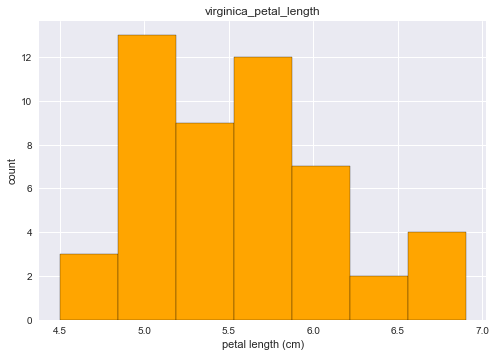

In [55]:
plt.hist(virginica_petal_length, bins=n_bins, edgecolor='black', facecolor='orange')
plt.ylabel('count')
plt.xlabel('petal length (cm)')
plt.title('virginica_petal_length')

### Transform iris dataset to pandas DataFrame

In [137]:
df_iris = pd.DataFrame(data = np.c_[iris['data'], iris['target']],
                       columns = iris['feature_names'] + ['target'])
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [138]:
# 0:setosa, 1:versicolor, 2:virginica
df_iris.columns = ['sepal_length','sepal_width','petal_length','petal_width','target']
df_iris['target'] = df_iris['target'].astype('int')
df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [160]:
def make_species(x):
    l_species = []
    for i in x:
        if (i == 0):
            l_species.append('setosa')
        elif (i == 1):
            l_species.append('versicolor')
        else:
            l_species.append('virginica')
            
    return l_species

In [162]:
df_iris['species'] = make_species(np.array(df_iris['target']))
df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


## Bee swarm plots

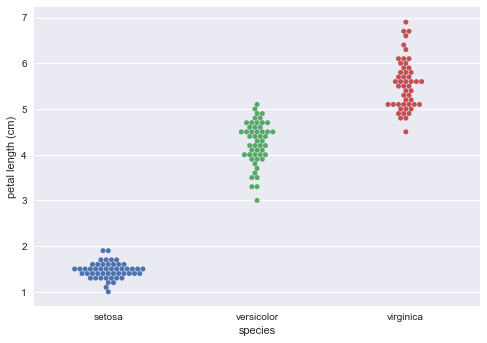

In [163]:
_ = sb.swarmplot(x='species', y='petal_length', data=df_iris)
_ = plt.xlabel('species')
_ = plt.ylabel('petal length (cm)')
plt.show()

## Empirical cumulative distribution function (ECDF)

In [164]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    n = len(data)      # Number of data points
    x = np.sort(data)
    y = np.arange(1, n+1) / n

    return x, y

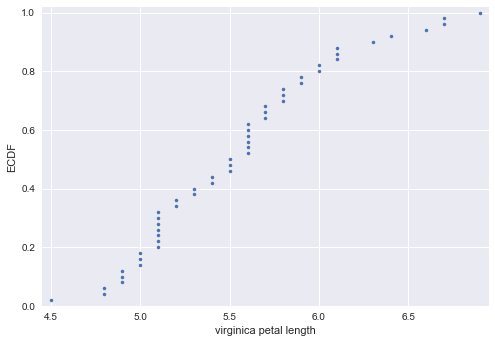

In [169]:
# Compute ECDF for versicolor data
x_value, y_value = ecdf(virginica_petal_length)

# Generate plot
_ = plt.plot(x_value, y_value, marker='.', linestyle='none')
_ = plt.margins(0.02)
_ = plt.ylabel('ECDF')
_ = plt.xlabel('virginica petal length')
plt.show()

# 4.5 ~ 5.5cm : 전체의 50%
# 6.0cm 이상 : 전체의 20%

In [170]:
# Comparison of ECDFs

In [172]:
setosa_petal_length = iris.data[0:50,2]
versicolor_petal_length = iris.data[50:100,2]
virginica_petal_length = iris.data[100:150,2]

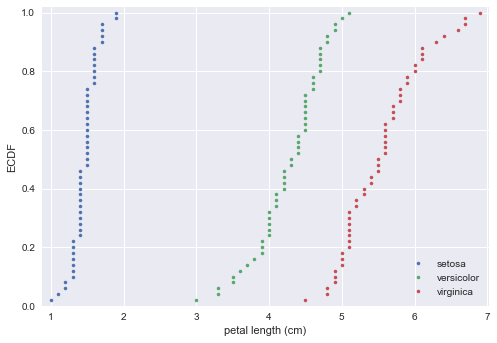

In [173]:
# Compute ECDFs
x_set, y_set = ecdf(setosa_petal_length)
x_vers, y_vers = ecdf(versicolor_petal_length)
x_virg, y_virg = ecdf(virginica_petal_length)

# Plot all ECDFs on the same plot
_ = plt.plot(x_set, y_set, marker='.', linestyle='none')
_ = plt.plot(x_vers, y_vers, marker='.', linestyle='none')
_ = plt.plot(x_virg, y_virg, marker='.', linestyle='none')

plt.margins(0.02)

# Annotate the plot
_ = plt.legend(('setosa', 'versicolor', 'virginica'), loc='lower right')
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('ECDF')

plt.show()

## 2. Quantitative exploratory data analysis

In [175]:
np.mean(versicolor_petal_length)

4.2599999999999998